# Maximum likelyhood estimation analysis 

## Hypotesis
There is a probable flare from Cygnus X-3.

In [22]:
from os.path import join
import shutil
from agilepy.api.AGAnalysis import AGAnalysis
from pathlib import Path

## Data

In [23]:
tmin="2020-02-05T00:01:07"
tmax="2020-02-07T00:01:07"
l=79.8
b=0.7
sources_hypotesis = """
15.7017e-08 80.3286 1.12047 2.16619 0 2 _2AGLJ2032+4135 0.0 0 0 0 0.5 5 20 10000 0 100
16.9737e-08 79.9247 0.661449 1.99734 0 2 CYGX3 0.0 0 0 0 0.5 5 20 10000 0 100
119.303e-08 78.2375 2.12298 1.75823 3 2 _2AGLJ2021+4029 0.0 1 3307.63 0 0.5 5 20 10000 0 100
8.30805e-08 76.5566 1.03365 2.60908 0 2 _2AGLJ2020+3824 0.0 0 0 0 0.5 5 20 10000 0 100
9.97261e-08 81.9171 3.0854 1.92501 0 2 _2AGLJ2029+4403 0.0 0 0 0 0.5 5 20 10000 0 100
"""
log_index="/AGILE_PROC3/DATA_ASDC2/INDEX/LOG.log.index"
evt_index="/AGILE_PROC3/FM3.119_ASDC2/INDEX/EVT.index"

out_dir="/home/rt/agilepy_analysis/cignus/output"
shutil.rmtree(out_dir)

work_dir="/home/rt/agilepy_analysis/cignus/conf"
Path(work_dir).mkdir(parents=True, exist_ok=True)

The tmin and tmax ISO datas can be converted to MJD or TT with the following web tool: https://tools.ssdc.asi.it/conversionTools

In [24]:
tmin_mjd=58884.00077546
tmax_mjd=58886.00077546

## Configuration file

In [25]:
conf_file_path = join(work_dir,"agilepy_conf.yaml")

In [26]:
conf_file = """
input:
  evtfile: %s
  logfile: %s

output:
  outdir: %s
  filenameprefix: cignus_analysis
  logfilenameprefix: cignus_analysis
  verboselvl: 1

selection:
  tmin: %f
  tmax: %f
  timetype: MJD
  glon: %f
  glat: %f
"""%(evt_index, log_index, out_dir, tmin_mjd, tmax_mjd, l, b)

In [27]:
with open(conf_file_path , "w") as cf:
    cf.write(conf_file)

## Sources file

In [28]:
sources_file_path = join(work_dir,"sources.txt")

In [29]:
with open(sources_file_path, "w") as sf:
    sf.write(sources_hypotesis)

## Starting the analysis

In [30]:
aga = AGAnalysis(conf_file_path, sources_file_path)

In [31]:
maplistfile = aga.generateMaps()

2020-02-07 15:34:14,548 [INFO    ] [CtsMapGenerator] Science tool called!
2020-02-07 15:34:16,457 [INFO    ] [AGAnalysis] Science tool ctsMapGenerator produced ['/home/rt/agilepy_analysis/cignus/output/maps/cignus_analysis_EMIN00100_EMAX10000_01.cts.gz']
2020-02-07 15:34:16,459 [INFO    ] [ExpMapGenerator] Science tool called!
2020-02-07 15:34:25,889 [INFO    ] [AGAnalysis] Science tool expMapGenerator produced ['/home/rt/agilepy_analysis/cignus/output/maps/cignus_analysis_EMIN00100_EMAX10000_01.exp.gz']
2020-02-07 15:34:25,891 [INFO    ] [GasMapGenerator] Science tool called!
2020-02-07 15:34:27,183 [INFO    ] [AGAnalysis] Science tool gasMapGenerator produced ['/home/rt/agilepy_analysis/cignus/output/maps/cignus_analysis_EMIN00100_EMAX10000_01.gas.gz']
2020-02-07 15:34:27,185 [INFO    ] [IntMapGenerator] Science tool called!
2020-02-07 15:34:27,830 [INFO    ] [AGAnalysis] Science tool intMapGenerator produced ['/home/rt/agilepy_analysis/cignus/output/maps/cignus_analysis_EMIN00100_EM

In [33]:
with open(maplistfile, "r") as mlf:
    mlf_content = mlf.readlines()

In [35]:
mlf_content = mlf_content[0].split(" ")

In [43]:
cts_map = mlf_content[0]
exp_map = mlf_content[1]

In [55]:
%matplotlib notebook

<IPython.core.display.Javascript object>


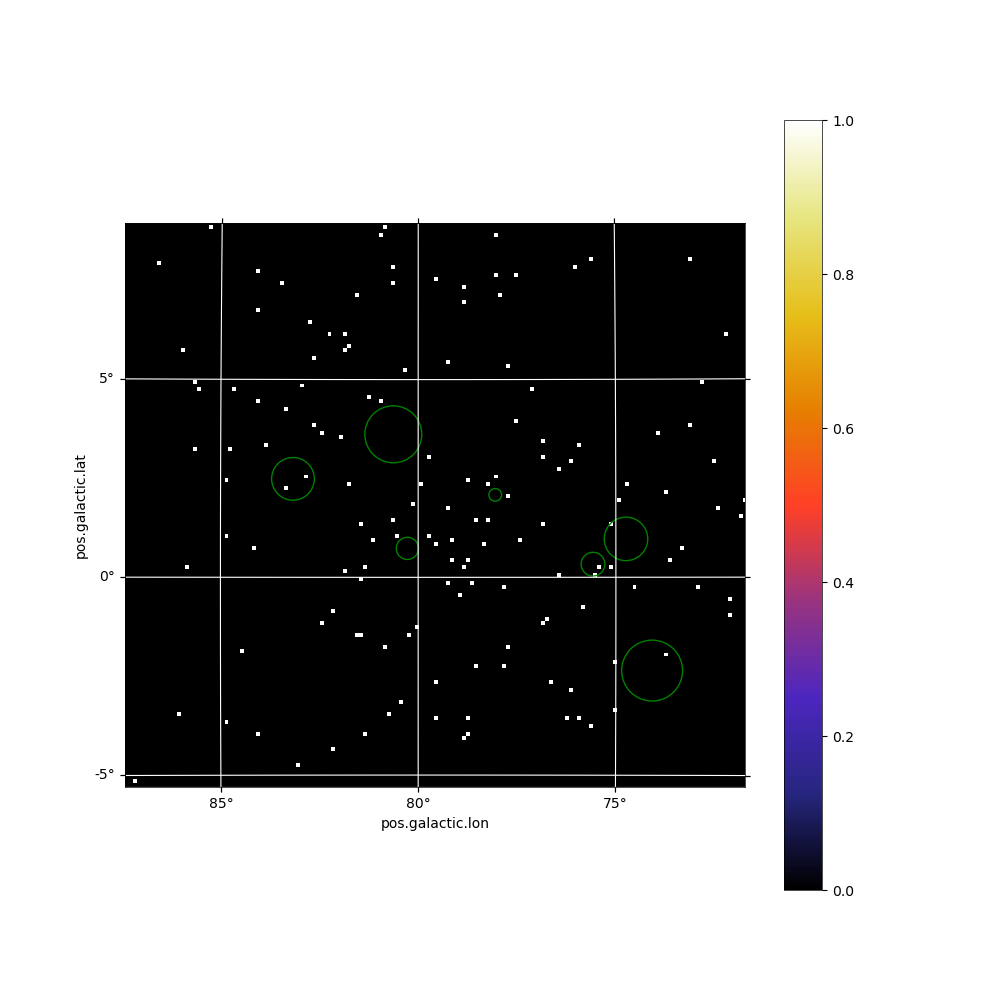

/home/rt/.conda/envs/agilepy/lib/python3.7/site-packages/regions/shapes/circle.py:148: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  return Circle(xy=xy, radius=radius, **mpl_params)


In [56]:
aga.displaySkyMap(cts_map, regFilePath="/home/rt/.conda/envs/agilepy/agiletools/catalogs/3EG_1.reg")

<IPython.core.display.Javascript object>


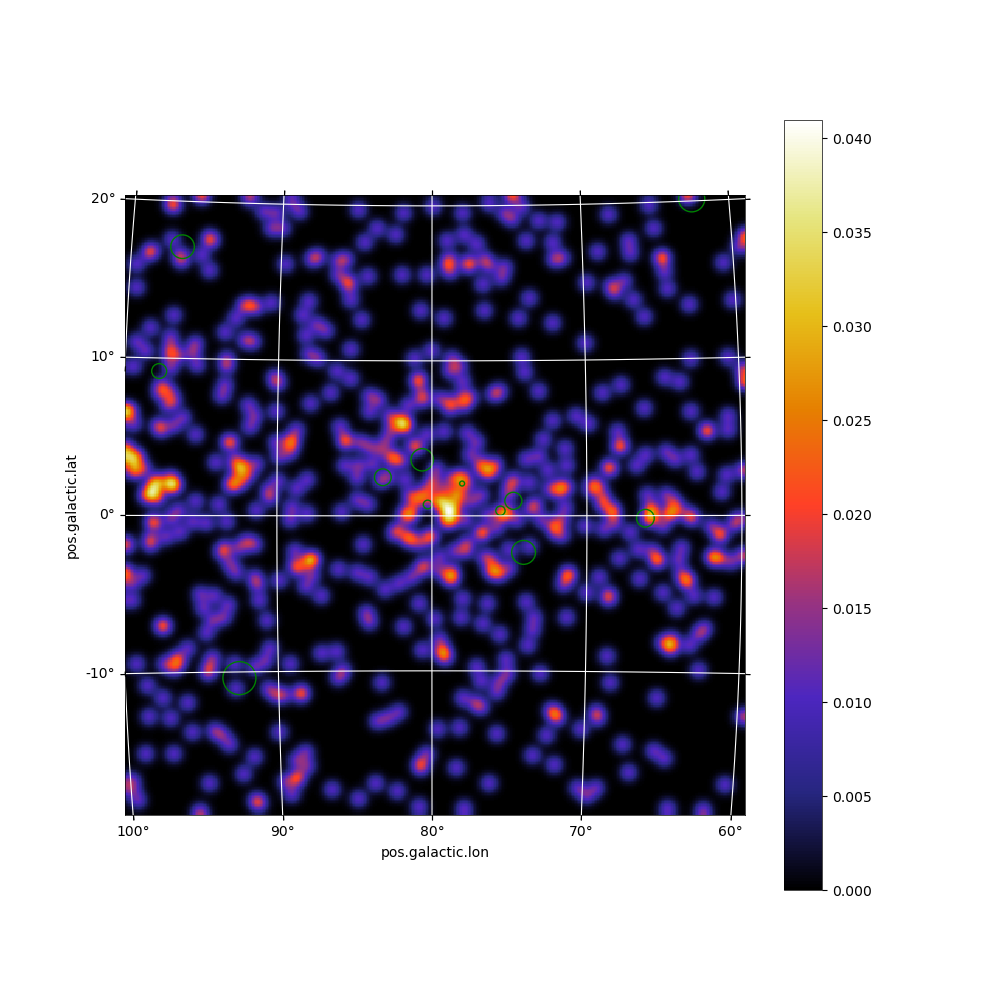

/home/rt/.conda/envs/agilepy/lib/python3.7/site-packages/regions/shapes/circle.py:148: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  return Circle(xy=xy, radius=radius, **mpl_params)


In [58]:
aga.displaySkyMap(cts_map, smooth=3, regFilePath="/home/rt/.conda/envs/agilepy/agiletools/catalogs/3EG_1.reg")

<IPython.core.display.Javascript object>


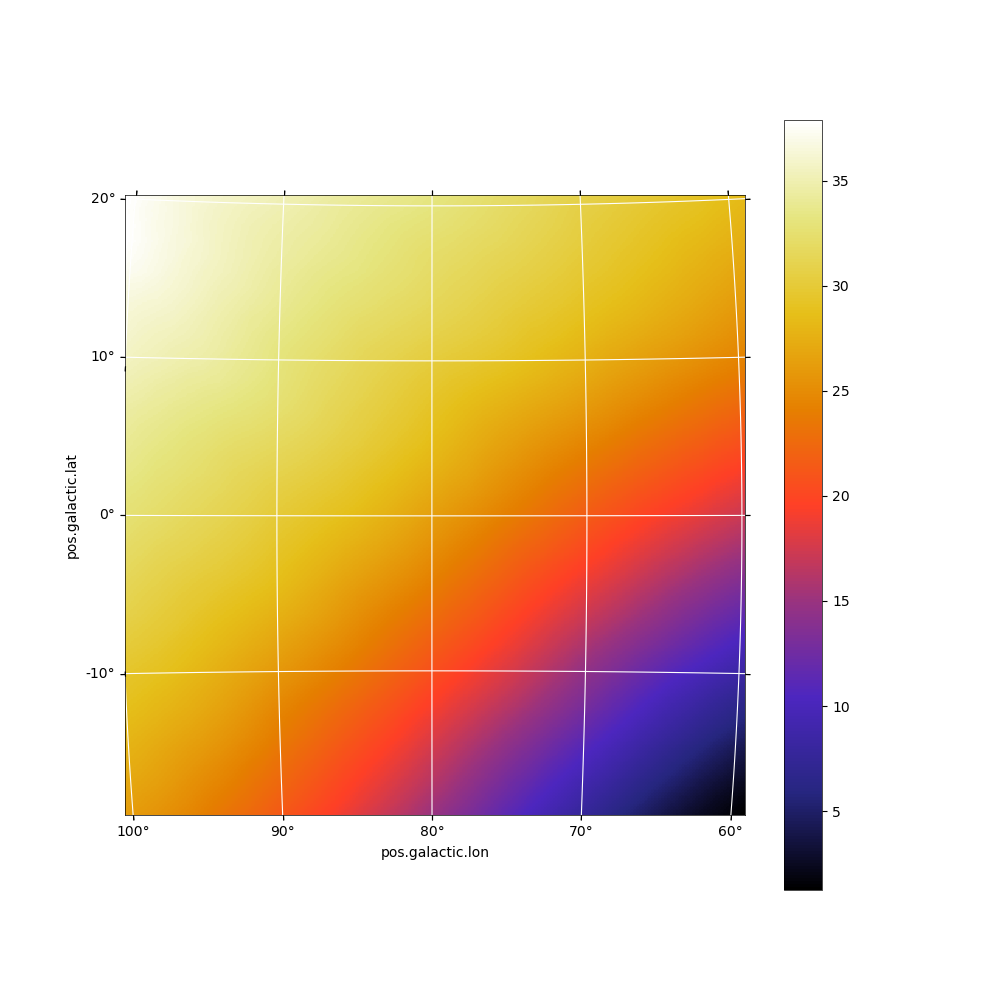

In [59]:
aga.displaySkyMap(exp_map)

In [61]:
aga.mle(maplistfile)

2020-02-07 15:43:27,190 [INFO    ] [Multi] Science tool called!
2020-02-07 15:43:30,018 [INFO    ] [AGAnalysis] AG_multi produced: ['/home/rt/agilepy_analysis/cignus/output/mle/cignus_analysis0000__2AGLJ2032+4135.source', '/home/rt/agilepy_analysis/cignus/output/mle/cignus_analysis0000_CYGX3.source', '/home/rt/agilepy_analysis/cignus/output/mle/cignus_analysis0000__2AGLJ2021+4029.source', '/home/rt/agilepy_analysis/cignus/output/mle/cignus_analysis0000__2AGLJ2020+3824.source', '/home/rt/agilepy_analysis/cignus/output/mle/cignus_analysis0000__2AGLJ2029+4403.source']


['/home/rt/agilepy_analysis/cignus/output/mle/cignus_analysis0000__2AGLJ2032+4135.source',
 '/home/rt/agilepy_analysis/cignus/output/mle/cignus_analysis0000_CYGX3.source',
 '/home/rt/agilepy_analysis/cignus/output/mle/cignus_analysis0000__2AGLJ2021+4029.source',
 '/home/rt/agilepy_analysis/cignus/output/mle/cignus_analysis0000__2AGLJ2020+3824.source',
 '/home/rt/agilepy_analysis/cignus/output/mle/cignus_analysis0000__2AGLJ2029+4403.source']

In [64]:
sources = aga.selectSources("Flux > 0")

In [66]:
for s in sources:
    print(s)

----------------------------------------------------------------
Source name: _2AGLJ2032+4135
Source type: PointSource
 - Spectrum type: PowerLaw 
	Flux=1.57017e-07 free=0
	Index=2.16619 free=0
 - SpatialModel type: PointSource free: 0
	glon: 80.3286
	glat: 1.12047
	dist: 0.6753814878643997
 - MultiOutput
	start_flux: 1.57017e-07
	Flux: 1.57017e-07
	Dist: 0.6753814878643997
	sqrt(TS): 0.0
----------------------------------------------------------------
----------------------------------------------------------------
Source name: CYGX3
Source type: PointSource
 - Spectrum type: PowerLaw 
	Flux=1.69737e-07 free=0
	Index=1.99734 free=0
 - SpatialModel type: PointSource free: 0
	glon: 79.9247
	glat: 0.661449
	dist: 0.130513695733262
 - MultiOutput
	start_flux: 1.69737e-07
	Flux: 1.69737e-07
	Dist: 0.130513695733262
	sqrt(TS): 0.0
----------------------------------------------------------------
----------------------------------------------------------------
Source name: _2AGLJ2021+4029
Sou